In [38]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [39]:
base_folder = './'
processed_dataset = './DatasetPro'
split_index_file = os.path.join(processed_dataset, 'split_index.csv')
train_output_file = os.path.join(processed_dataset, 'train_features.csv')
val_output_file = os.path.join(processed_dataset, 'val_features.csv')
test_output_file = os.path.join(processed_dataset, 'test_features.csv')

In [40]:
# Load the CSV files
print(f"📂 Loading training data from {train_output_file}...")
train_data = pd.read_csv(train_output_file)
print(f"✅ Loaded training data. Shape: {train_data.shape}")

print(f"📂 Loading validation data from {val_output_file}...")
val_data = pd.read_csv(val_output_file)
print(f"✅ Loaded validation data. Shape: {val_data.shape}")

print(f"📂 Loading test data from {test_output_file}...")
test_data = pd.read_csv(test_output_file)
print(f"✅ Loaded test data. Shape: {test_data.shape}")

# Extract features and labels
print("🔍 Extracting features and labels...")

# Features (normal chroma) are all columns except the last two (label and sequence_id)
X_train = train_data.iloc[:, :-2].values  # All columns except last two (sequence_id and label)
y_train = train_data.iloc[:, -2].values  # Second-to-last column is the label
sequence_indices_train = train_data.iloc[:, -1].values  # Last column is the sequence_id

X_val = val_data.iloc[:, :-2].values
y_val = val_data.iloc[:, -2].values
sequence_indices_val = val_data.iloc[:, -1].values

X_test = test_data.iloc[:, :-2].values
y_test = test_data.iloc[:, -2].values
sequence_indices_test = test_data.iloc[:, -1].values

# Check the shapes of the features and labels
print(f"✅ Training features shape: {X_train.shape}, Labels shape: {y_train.shape}")
print(f"✅ Validation features shape: {X_val.shape}, Labels shape: {y_val.shape}")
print(f"✅ Test features shape: {X_test.shape}, Labels shape: {y_test.shape}")

# One-hot encode the labels (assuming 37 unique chords)
print("🔄 One-hot encoding the labels...")
y_train = to_categorical(y_train, num_classes=37)
y_val = to_categorical(y_val, num_classes=37)
y_test = to_categorical(y_test, num_classes=37)

print(f"✅ One-hot encoded labels. Shapes: \n Train: {y_train.shape} \n Validation: {y_val.shape} \n Test: {y_test.shape}")

# Reshape the data for LSTM input (samples, timesteps, features)
print("🔄 Reshaping data for LSTM input...")

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))  # Shape: (num_samples, 1, 12)
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))  # Shape: (num_samples, 1, 12)
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))  # Shape: (num_samples, 1, 12)

print(f"✅ Reshaped data. Shapes: \n Train: {X_train.shape} \n Validation: {X_val.shape} \n Test: {X_test.shape}")


📂 Loading training data from ./DatasetPro/train_features.csv...
✅ Loaded training data. Shape: (2910661, 14)
📂 Loading validation data from ./DatasetPro/val_features.csv...
✅ Loaded validation data. Shape: (607277, 14)
📂 Loading test data from ./DatasetPro/test_features.csv...
✅ Loaded test data. Shape: (624488, 14)
🔍 Extracting features and labels...
✅ Training features shape: (2910661, 12), Labels shape: (2910661,)
✅ Validation features shape: (607277, 12), Labels shape: (607277,)
✅ Test features shape: (624488, 12), Labels shape: (624488,)
🔄 One-hot encoding the labels...
✅ One-hot encoded labels. Shapes: 
 Train: (2910661, 37) 
 Validation: (607277, 37) 
 Test: (624488, 37)
🔄 Reshaping data for LSTM input...
✅ Reshaped data. Shapes: 
 Train: (2910661, 1, 12) 
 Validation: (607277, 1, 12) 
 Test: (624488, 1, 12)


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, None, 12)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_12                │ (None, None, 256)      │       144,384 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, None, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_13                │ (None, 256)            │       394,240 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 37)             │         2,405 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 582,181 (2.22 MB)

 Trainable params: 582,181 (2.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
45480/45480 ━━━━━━━━━━━━━━━━━━━━ 268s 6ms/step - accuracy: 0.4445 - loss: 1.9726 - val_accuracy: 0.4930 - val_loss: 1.7995
Epoch 2/20
45480/45480 ━━━━━━━━━━━━━━━━━━━━ 265s 6ms/step - accuracy: 0.4653 - loss: 1.8695 - val_accuracy: 0.4954 - val_loss: 1.8010
Epoch 3/20
45480/45480 ━━━━━━━━━━━━━━━━━━━━ 264s 6ms/step - accuracy: 0.4694 - loss: 1.8504 - val_accuracy: 0.4966 - val_loss: 1.7949
Epoch 4/20
45480/45480 ━━━━━━━━━━━━━━━━━━━━ 263s 6ms/step - accuracy: 0.4715 - loss: 1.8416 - val_accuracy: 0.4974 - val_loss: 1.7924
Epoch 5/20
45480/45480 ━━━━━━━━━━━━━━━━━━━━ 266s 6ms/step - accuracy: 0.4729 - loss: 1.8331 - val_accuracy: 0.4973 - val_loss: 1.7885
Epoch 6/20
45480/45480 ━━━━━━━━━━━━━━━━━━━━ 262s 6ms/step - accuracy: 0.4746 - loss: 1.8264 - val_accuracy: 0.5009 - val_loss: 1.7855
Epoch 7/20
45480/45480 ━━━━━━━━━━━━━━━━━━━━ 262s 6ms/step - accuracy: 0.4755 - loss: 1.8225 - val_accuracy: 0.4980 - val_loss: 1.7898
Epoch 8/20
45480/45480 ━━━━━━━━━━━━━━━━━━━━ 263s 6ms/step - ac

Test Accuracy: 0.4952441155910492


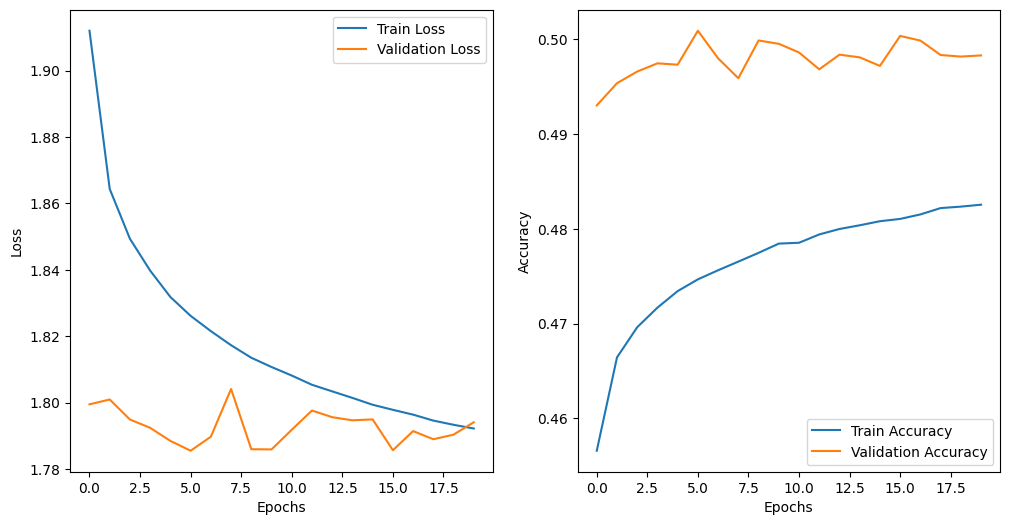

In [42]:
# # Define model parameters
# input_shape = (None, 12)  # For chromagram (12-note chromagram per time step)
# num_classes = 37  # 12 maj, 12 min, 12 7th, N

# # Input layer
# input_layer = Input(shape=input_shape)

# # First Bidirectional LSTM layer
# lstm_1 = Bidirectional(LSTM(128, return_sequences=True))(input_layer)
# dropout_1 = Dropout(0.3)(lstm_1)

# # Second Bidirectional LSTM layer (Fix: return_sequences=False)
# lstm_2 = Bidirectional(LSTM(128, return_sequences=False))(dropout_1)  # Only last time step is used
# dropout_2 = Dropout(0.3)(lstm_2)

# # Output layer
# output = Dense(num_classes, activation='softmax')(dropout_2)

# # Build and compile the model
# model = Model(inputs=input_layer, outputs=output)
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Model summary
# model.summary()


# Define model parameters
input_shape = (None, 12)  # Assuming chromagram input (12 features per timestep)
num_classes = 37          # Number of output chord classes

# Input layer
input_layer = Input(shape=input_shape)

# First Bidirectional LSTM layer
bi_lstm_1 = Bidirectional(LSTM(128, return_sequences=True))(input_layer)
dropout_1 = Dropout(0.3)(bi_lstm_1)

# Second Bidirectional LSTM layer
bi_lstm_2 = Bidirectional(LSTM(128, return_sequences=False))(dropout_1)  # No return_sequences in last LSTM
dropout_2 = Dropout(0.3)(bi_lstm_2)

# Fully connected layers
dense_1 = Dense(128, activation='relu')(dropout_2)
dense_2 = Dense(64, activation='relu')(dense_1)

# Output layer
output = Dense(num_classes, activation='softmax')(dense_2)

# Build and compile the model
model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

# Optionally, save the model
model.save('chord_recognition_model.h5')

# Optionally, plot training history (loss and accuracy)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()